In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('train.csv')

In [3]:
def analyze_data(dataframe):
    print('########## HEAD #################')
    print(dataframe.head())
    print('############## INFO #############')
    print(dataframe.info())
    print('############ DESCRIBE ###########')
    print(dataframe.describe().T)
    print('########### SHAPE ###############')
    print(dataframe.shape)
    print('########### ISNA ###############')
    print(dataframe.isna().sum())
    print('############ TYPES ##############')
    print(dataframe.dtypes)
    print("########### QUANTILES ###########")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)   

In [4]:
analyze_data(df1)


########## HEAD #################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition 

C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3345585550.py:15: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [5]:
def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != 'O'
                        and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == 'O' and
                        dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df1)

Observations: 1460
Variables: 81
cat_cols: 53
num_cols: 27
cat_but_car: 1
num_but_cat: 11


In [7]:
df1[cat_cols].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
OverallCond       9
BsmtFullBath      4
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4
Fireplaces        4


In [8]:
df1[cat_cols].dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType         object
SaleCondition   

In [9]:
num_cols
df1[num_cols].nunique()
df1[num_cols].dtypes


Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
TotRmsAbvGrd       int64
GarageYrBlt      float64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
MiscVal            int64
MoSold             int64
SalePrice          int64
dtype: object

In [10]:
cat_but_car
df1[cat_but_car].nunique()
df1[cat_but_car].dtypes

Neighborhood    object
dtype: object

In [11]:
def outliers(dataframe, col_name, q1=0.05, q3=0.95):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interq = quantile3 - quantile1
    
    down = quantile1 - 1.5 * interq
    up = quantile3 + 1.5 * interq
    
    return down, up

In [12]:
for col in num_cols:
    print(outliers(df1, col))

(-1895.6999999999998, 3356.7)
(-190.0, 370.0)
(-75.5, 216.5)
(-17822.474999999995, 38535.325)
(-2.0, 14.0)
(1779.5, 2143.5)
(1864.5, 2092.5)
(-684.0, 1140.0)
(-1911.0, 3185.0)
(-594.2999999999997, 990.4999999999995)
(-2202.0, 3670.0)
(-1331.2499999999995, 3603.5499999999997)
(-1064.4999999999995, 3568.6999999999994)
(-1711.5749999999998, 2852.625)
(0.0, 0.0)
(-1579.1499999999996, 4893.25)
(-5.0, 19.0)
(1814.5, 2122.5)
(-1275.1499999999999, 2125.25)
(-502.5, 837.5)
(-262.57499999999993, 437.6249999999999)
(-270.2249999999998, 450.37499999999966)
(0.0, 0.0)
(-240.0, 400.0)
(0.0, 0.0)
(-11.5, 24.5)
(-269149.9999999998, 683249.9999999998)


In [13]:
def check_outliers(dataframe, col_name):
    down, up = outliers(dataframe, col_name)
    if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
        return True
    else:
        return False

In [14]:
for col in num_cols:
    print(col, check_outliers(df1, col))

Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True
MoSold False
SalePrice True


C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe

In [15]:
def replace_outliers(dataframe,col_name):
    down, up = outliers(dataframe,col_name)
    if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):
        dataframe.loc[(dataframe[col_name] < down) , col_name] = down
        dataframe.loc[(dataframe[col_name] > up) , col_name] = up
        return dataframe

In [16]:
for col in num_cols:
    replace_outliers(df1, col)

C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3918181790.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3918181790.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3918181790.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe.loc[(dataframe[col_name] > up) | (dataframe[col_name] < down)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3918181790.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if datafram

In [17]:
for col in num_cols:
    print(col, check_outliers(df1, col))

C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe

Id False
MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
MiscVal False
MoSold False
SalePrice False


C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):
C:\Users\s7522\AppData\Local\Temp\ipykernel_23392\3667971048.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  if dataframe[(dataframe[col_name] < down) | (dataframe[col_name] > up)].any(None):


In [18]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                        'Ratio' : dataframe[col_name].value_counts()/ len(dataframe)}))
    print('################################')
    if plot :
        sns.countplot( x=dataframe[col_name], data=dataframe)
        plt.show()

         MSZoning     Ratio
RL           1151  0.788356
RM            218  0.149315
FV             65  0.044521
RH             16  0.010959
C (all)        10  0.006849
################################


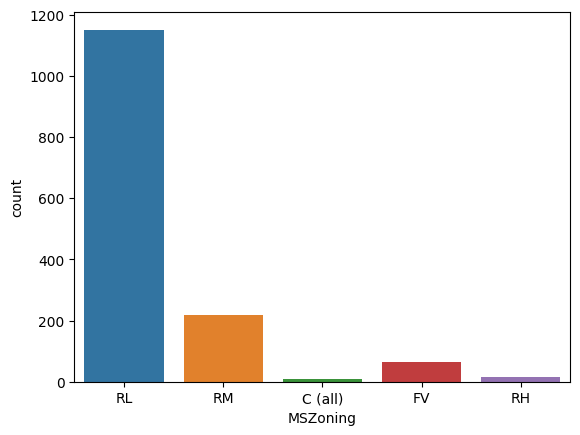

      Street    Ratio
Pave    1454  0.99589
Grvl       6  0.00411
################################


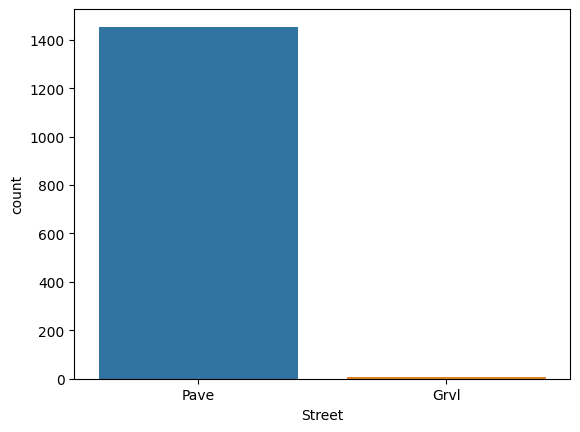

      Alley     Ratio
Grvl     50  0.034247
Pave     41  0.028082
################################


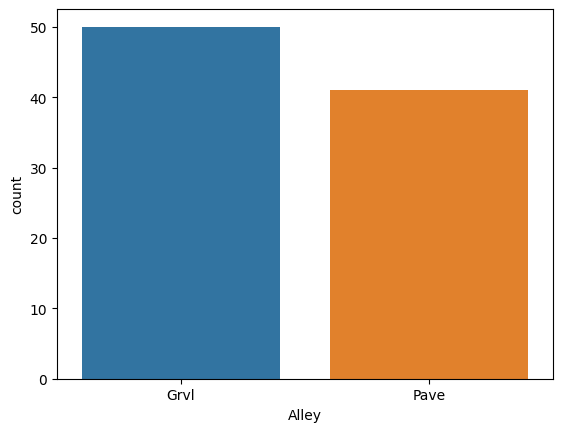

     LotShape     Ratio
Reg       925  0.633562
IR1       484  0.331507
IR2        41  0.028082
IR3        10  0.006849
################################


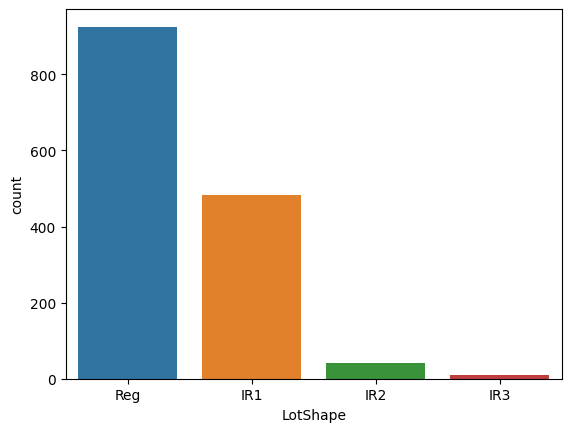

     LandContour     Ratio
Lvl         1311  0.897945
Bnk           63  0.043151
HLS           50  0.034247
Low           36  0.024658
################################


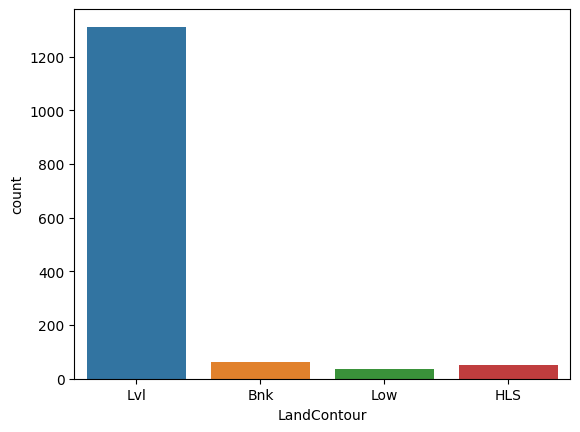

        Utilities     Ratio
AllPub       1459  0.999315
NoSeWa          1  0.000685
################################


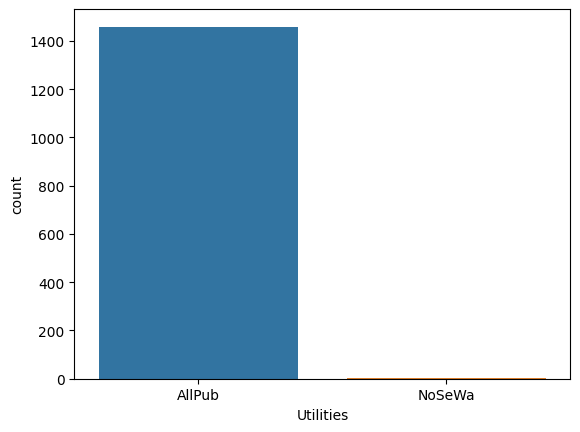

         LotConfig     Ratio
Inside        1052  0.720548
Corner         263  0.180137
CulDSac         94  0.064384
FR2             47  0.032192
FR3              4  0.002740
################################


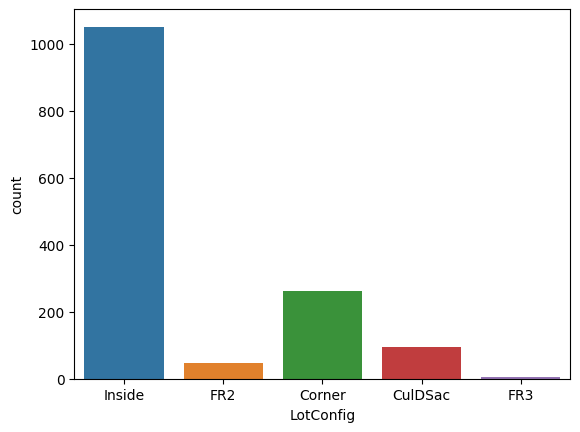

     LandSlope     Ratio
Gtl       1382  0.946575
Mod         65  0.044521
Sev         13  0.008904
################################


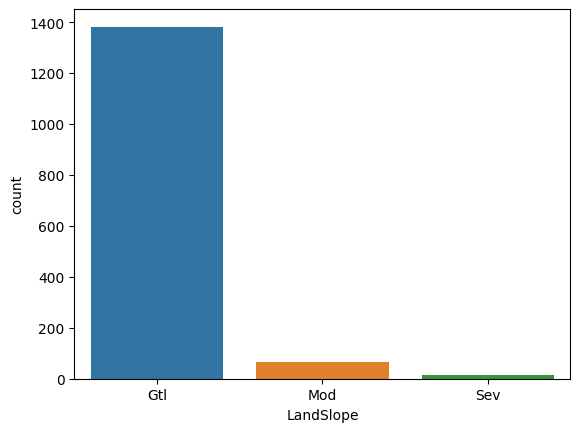

        Condition1     Ratio
Norm          1260  0.863014
Feedr           81  0.055479
Artery          48  0.032877
RRAn            26  0.017808
PosN            19  0.013014
RRAe            11  0.007534
PosA             8  0.005479
RRNn             5  0.003425
RRNe             2  0.001370
################################


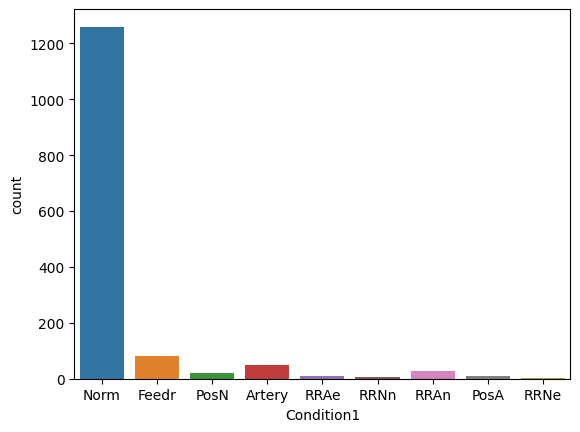

        Condition2     Ratio
Norm          1445  0.989726
Feedr            6  0.004110
Artery           2  0.001370
RRNn             2  0.001370
PosN             2  0.001370
PosA             1  0.000685
RRAn             1  0.000685
RRAe             1  0.000685
################################


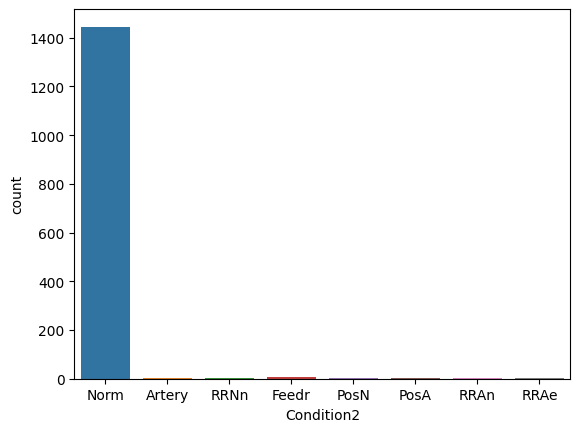

        BldgType     Ratio
1Fam        1220  0.835616
TwnhsE       114  0.078082
Duplex        52  0.035616
Twnhs         43  0.029452
2fmCon        31  0.021233
################################


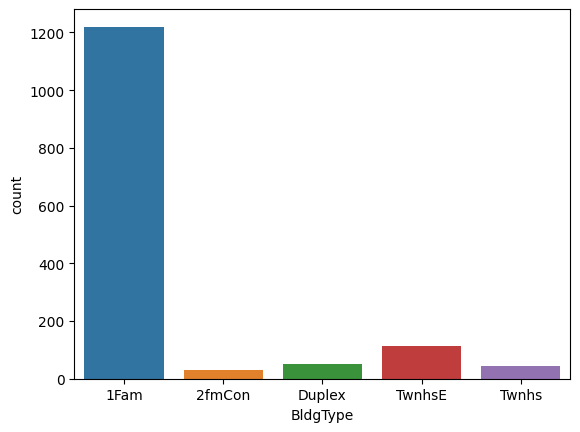

        HouseStyle     Ratio
1Story         726  0.497260
2Story         445  0.304795
1.5Fin         154  0.105479
SLvl            65  0.044521
SFoyer          37  0.025342
1.5Unf          14  0.009589
2.5Unf          11  0.007534
2.5Fin           8  0.005479
################################


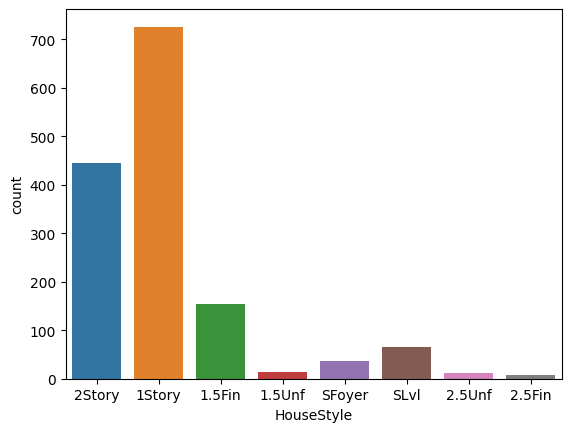

         RoofStyle     Ratio
Gable         1141  0.781507
Hip            286  0.195890
Flat            13  0.008904
Gambrel         11  0.007534
Mansard          7  0.004795
Shed             2  0.001370
################################


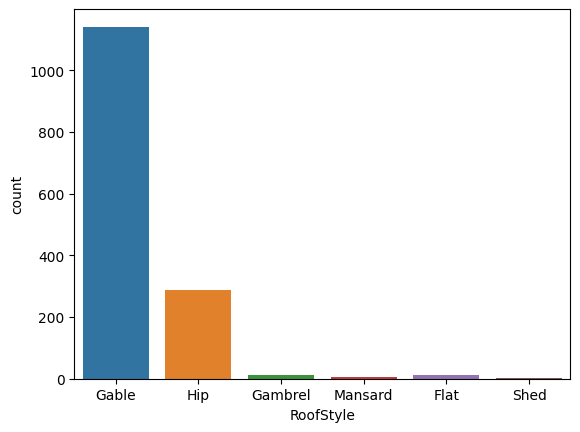

         RoofMatl     Ratio
CompShg      1434  0.982192
Tar&Grv        11  0.007534
WdShngl         6  0.004110
WdShake         5  0.003425
Metal           1  0.000685
Membran         1  0.000685
Roll            1  0.000685
ClyTile         1  0.000685
################################


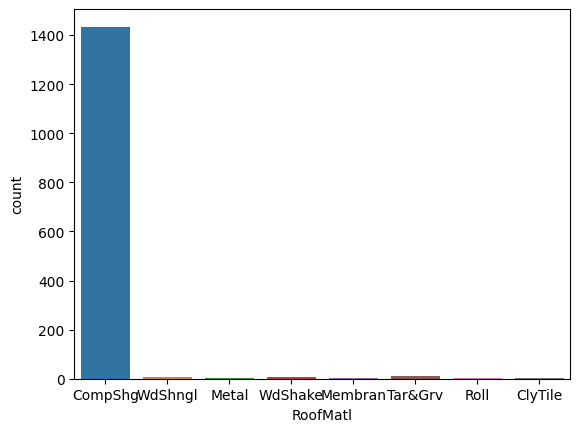

         Exterior1st     Ratio
VinylSd          515  0.352740
HdBoard          222  0.152055
MetalSd          220  0.150685
Wd Sdng          206  0.141096
Plywood          108  0.073973
CemntBd           61  0.041781
BrkFace           50  0.034247
WdShing           26  0.017808
Stucco            25  0.017123
AsbShng           20  0.013699
BrkComm            2  0.001370
Stone              2  0.001370
AsphShn            1  0.000685
ImStucc            1  0.000685
CBlock             1  0.000685
################################


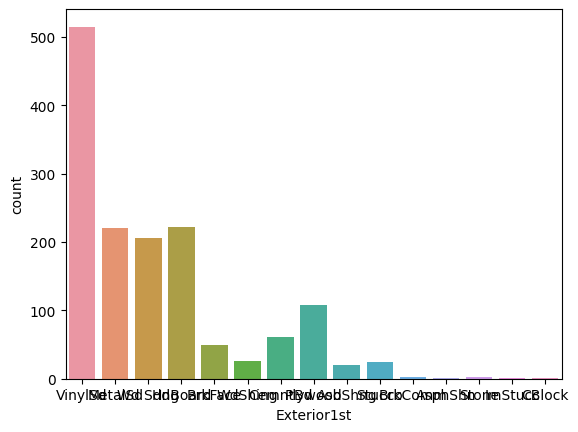

         Exterior2nd     Ratio
VinylSd          504  0.345205
MetalSd          214  0.146575
HdBoard          207  0.141781
Wd Sdng          197  0.134932
Plywood          142  0.097260
CmentBd           60  0.041096
Wd Shng           38  0.026027
Stucco            26  0.017808
BrkFace           25  0.017123
AsbShng           20  0.013699
ImStucc           10  0.006849
Brk Cmn            7  0.004795
Stone              5  0.003425
AsphShn            3  0.002055
Other              1  0.000685
CBlock             1  0.000685
################################


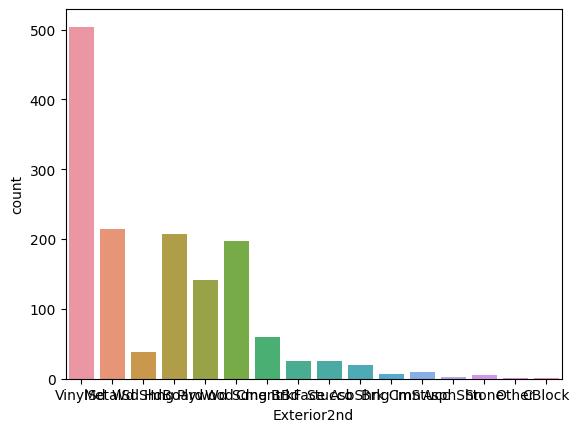

         MasVnrType     Ratio
None            864  0.591781
BrkFace         445  0.304795
Stone           128  0.087671
BrkCmn           15  0.010274
################################


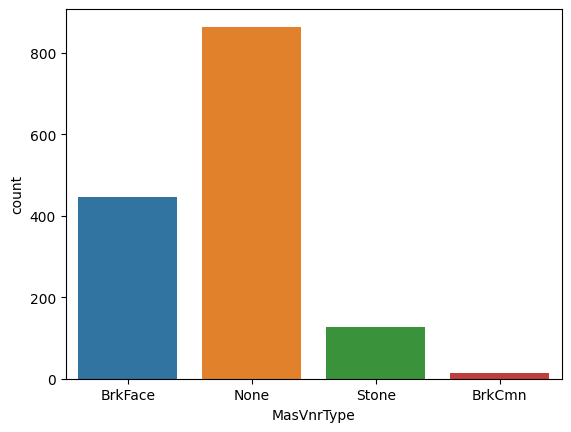

    ExterQual     Ratio
TA        906  0.620548
Gd        488  0.334247
Ex         52  0.035616
Fa         14  0.009589
################################


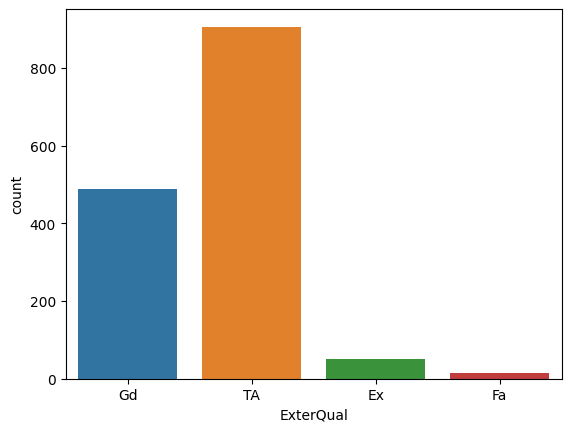

    ExterCond     Ratio
TA       1282  0.878082
Gd        146  0.100000
Fa         28  0.019178
Ex          3  0.002055
Po          1  0.000685
################################


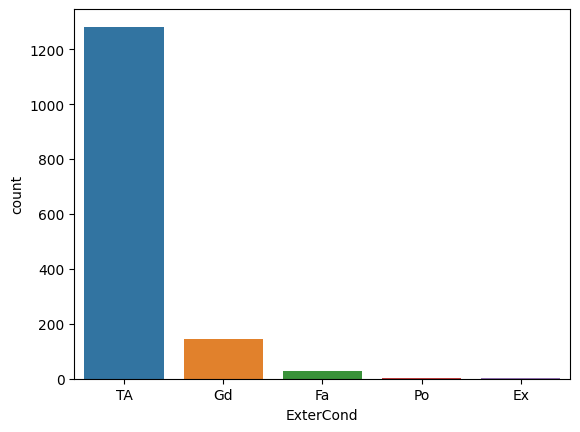

        Foundation     Ratio
PConc          647  0.443151
CBlock         634  0.434247
BrkTil         146  0.100000
Slab            24  0.016438
Stone            6  0.004110
Wood             3  0.002055
################################


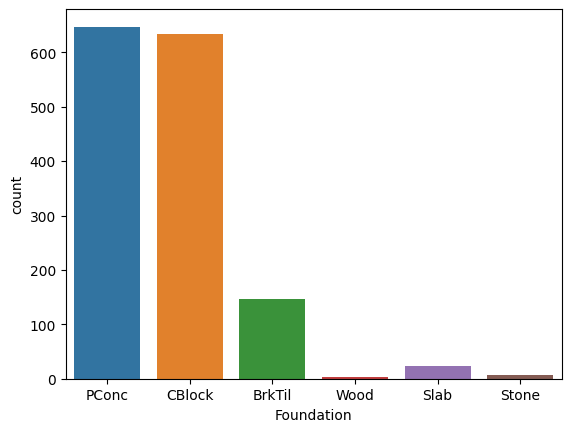

    BsmtQual     Ratio
TA       649  0.444521
Gd       618  0.423288
Ex       121  0.082877
Fa        35  0.023973
################################


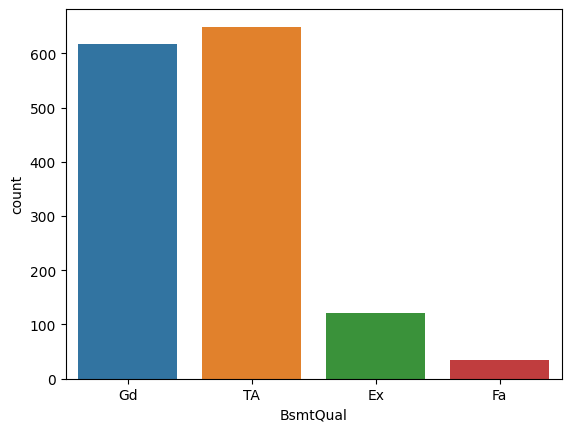

    BsmtCond     Ratio
TA      1311  0.897945
Gd        65  0.044521
Fa        45  0.030822
Po         2  0.001370
################################


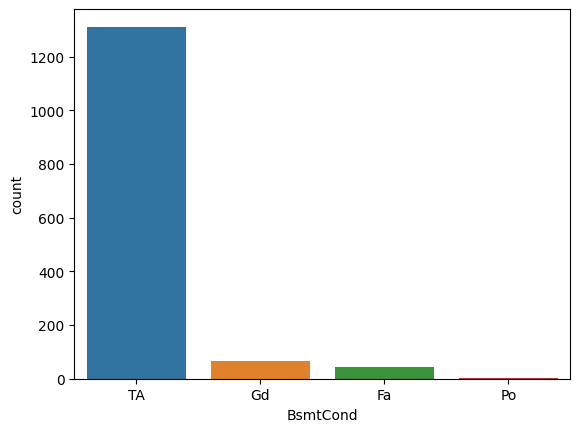

    BsmtExposure     Ratio
No           953  0.652740
Av           221  0.151370
Gd           134  0.091781
Mn           114  0.078082
################################


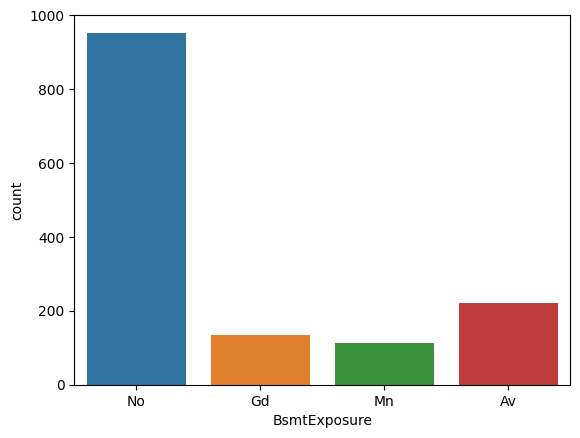

     BsmtFinType1     Ratio
Unf           430  0.294521
GLQ           418  0.286301
ALQ           220  0.150685
BLQ           148  0.101370
Rec           133  0.091096
LwQ            74  0.050685
################################


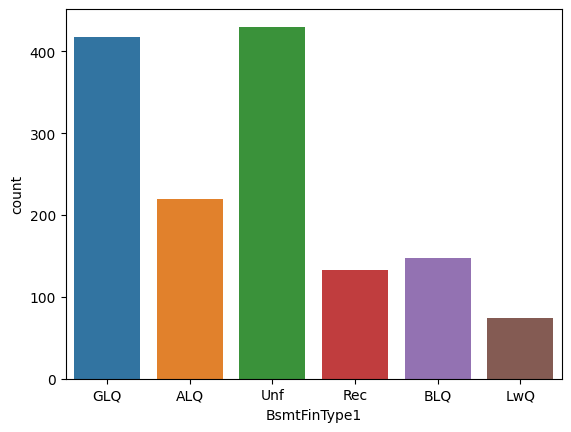

     BsmtFinType2     Ratio
Unf          1256  0.860274
Rec            54  0.036986
LwQ            46  0.031507
BLQ            33  0.022603
ALQ            19  0.013014
GLQ            14  0.009589
################################


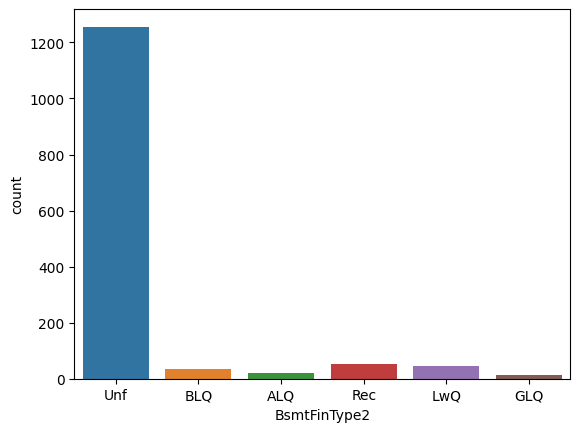

       Heating     Ratio
GasA      1428  0.978082
GasW        18  0.012329
Grav         7  0.004795
Wall         4  0.002740
OthW         2  0.001370
Floor        1  0.000685
################################


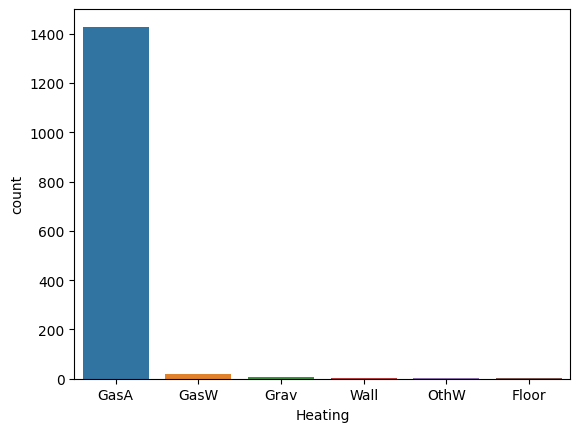

    HeatingQC     Ratio
Ex        741  0.507534
TA        428  0.293151
Gd        241  0.165068
Fa         49  0.033562
Po          1  0.000685
################################


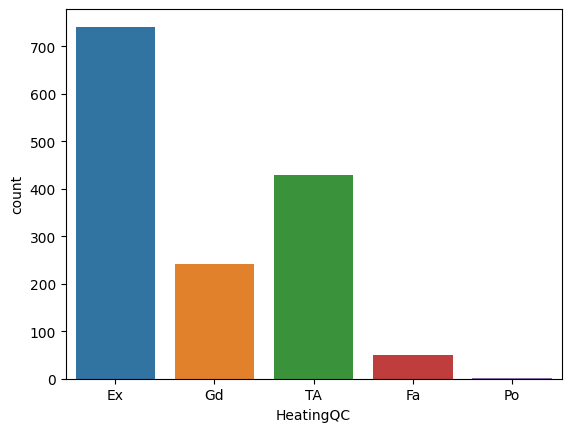

   CentralAir     Ratio
Y        1365  0.934932
N          95  0.065068
################################


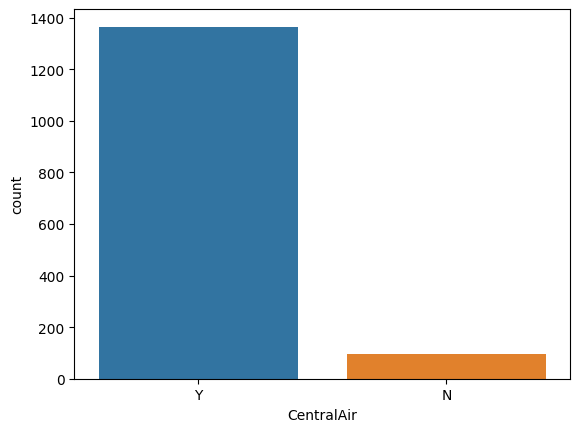

       Electrical     Ratio
SBrkr        1334  0.913699
FuseA          94  0.064384
FuseF          27  0.018493
FuseP           3  0.002055
Mix             1  0.000685
################################


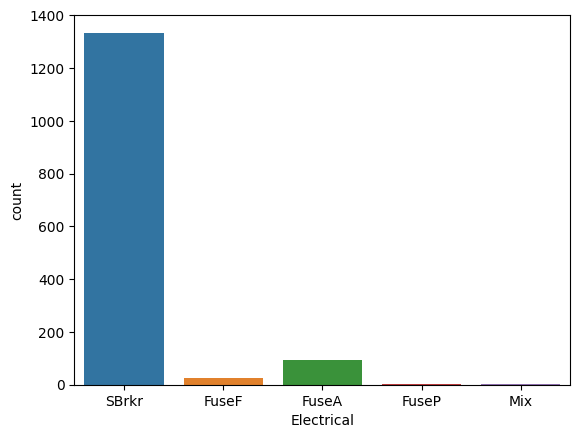

    KitchenQual     Ratio
TA          735  0.503425
Gd          586  0.401370
Ex          100  0.068493
Fa           39  0.026712
################################


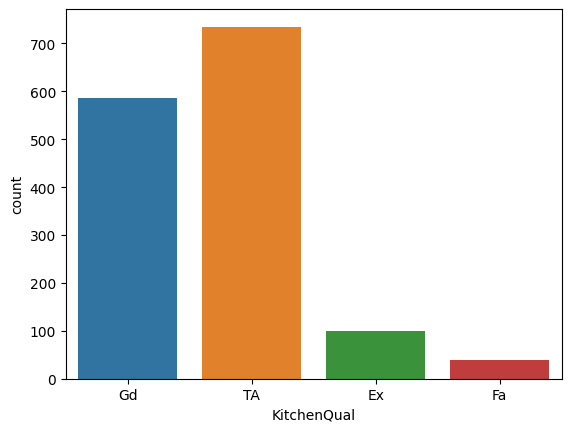

      Functional     Ratio
Typ         1360  0.931507
Min2          34  0.023288
Min1          31  0.021233
Mod           15  0.010274
Maj1          14  0.009589
Maj2           5  0.003425
Sev            1  0.000685
################################


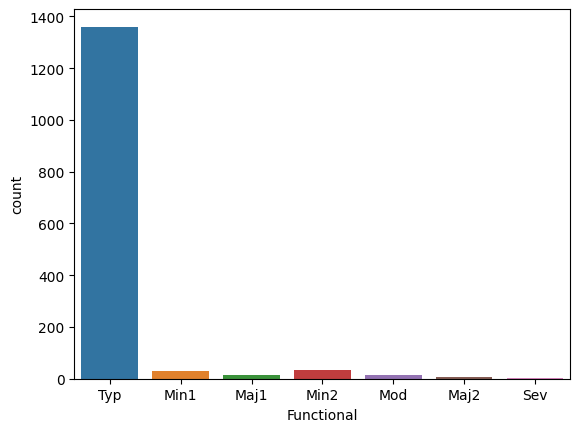

    FireplaceQu     Ratio
Gd          380  0.260274
TA          313  0.214384
Fa           33  0.022603
Ex           24  0.016438
Po           20  0.013699
################################


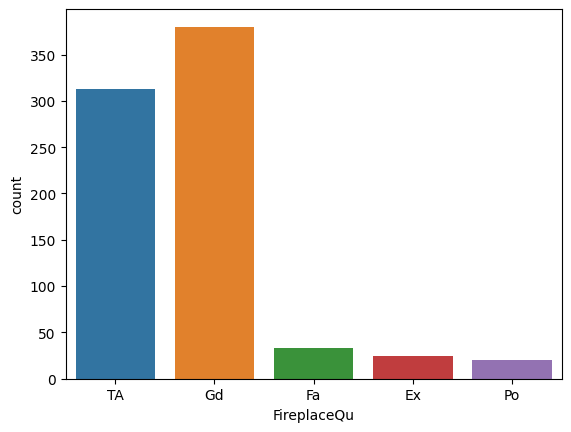

         GarageType     Ratio
Attchd          870  0.595890
Detchd          387  0.265068
BuiltIn          88  0.060274
Basment          19  0.013014
CarPort           9  0.006164
2Types            6  0.004110
################################


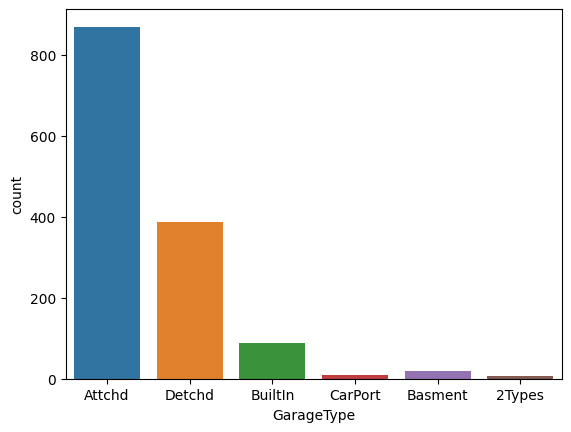

     GarageFinish     Ratio
Unf           605  0.414384
RFn           422  0.289041
Fin           352  0.241096
################################


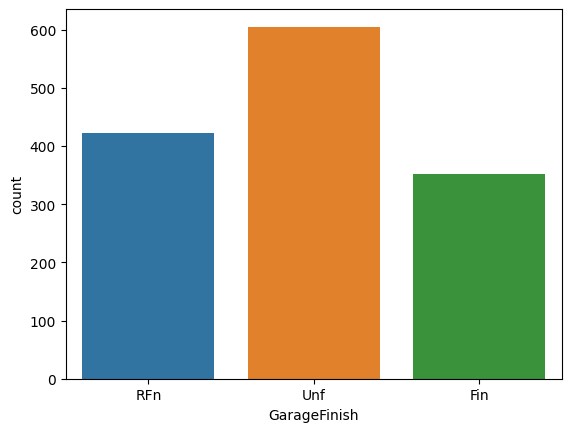

    GarageQual     Ratio
TA        1311  0.897945
Fa          48  0.032877
Gd          14  0.009589
Ex           3  0.002055
Po           3  0.002055
################################


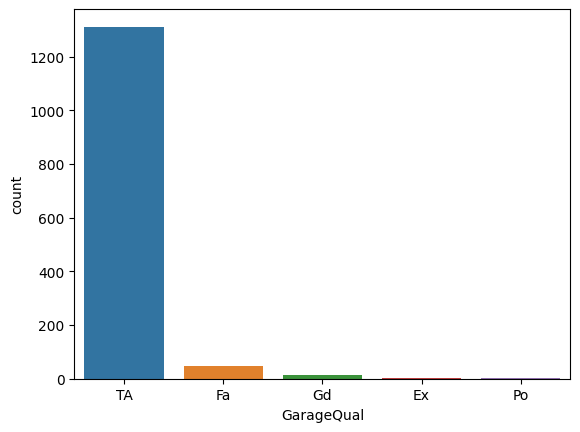

    GarageCond     Ratio
TA        1326  0.908219
Fa          35  0.023973
Gd           9  0.006164
Po           7  0.004795
Ex           2  0.001370
################################


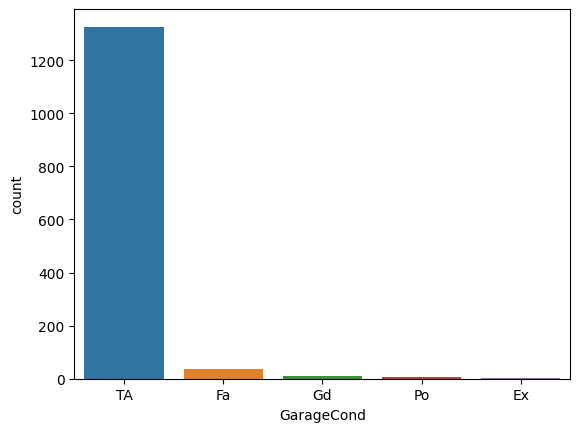

   PavedDrive     Ratio
Y        1340  0.917808
N          90  0.061644
P          30  0.020548
################################


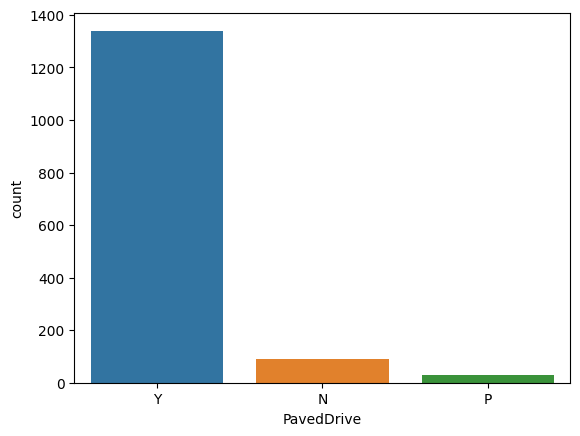

    PoolQC     Ratio
Gd       3  0.002055
Ex       2  0.001370
Fa       2  0.001370
################################


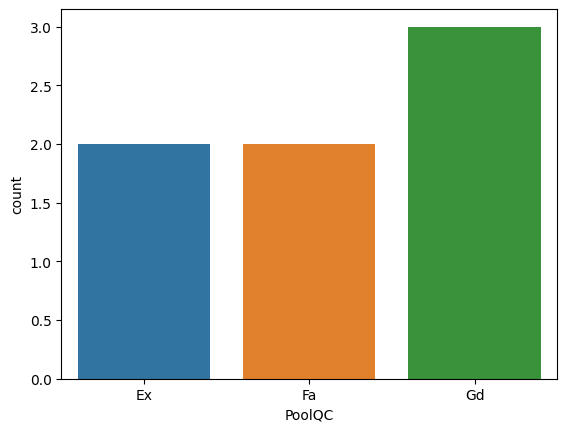

       Fence     Ratio
MnPrv    157  0.107534
GdPrv     59  0.040411
GdWo      54  0.036986
MnWw      11  0.007534
################################


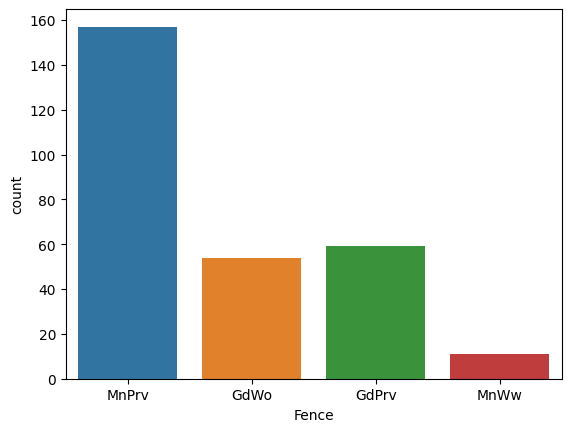

      MiscFeature     Ratio
Shed           49  0.033562
Gar2            2  0.001370
Othr            2  0.001370
TenC            1  0.000685
################################


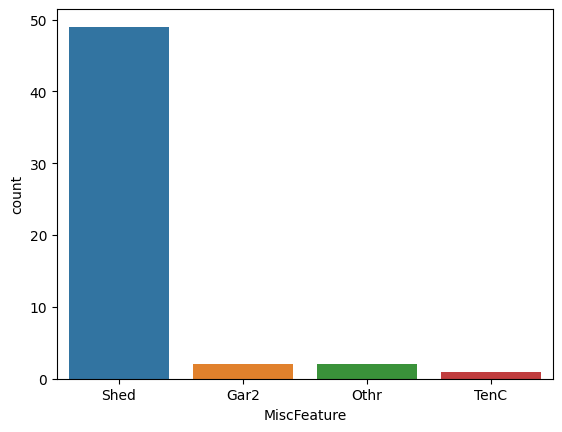

       SaleType     Ratio
WD         1267  0.867808
New         122  0.083562
COD          43  0.029452
ConLD         9  0.006164
ConLI         5  0.003425
ConLw         5  0.003425
CWD           4  0.002740
Oth           3  0.002055
Con           2  0.001370
################################


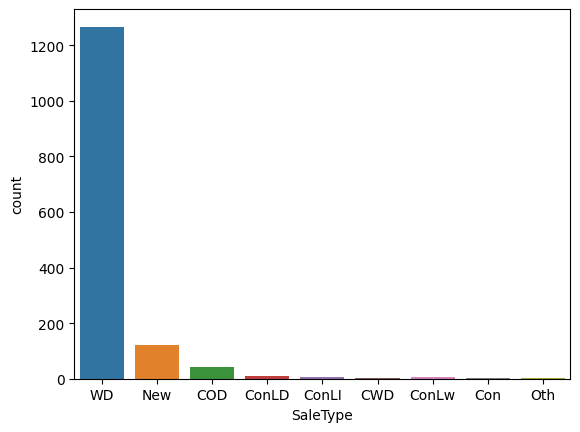

         SaleCondition     Ratio
Normal            1198  0.820548
Partial            125  0.085616
Abnorml            101  0.069178
Family              20  0.013699
Alloca              12  0.008219
AdjLand              4  0.002740
################################


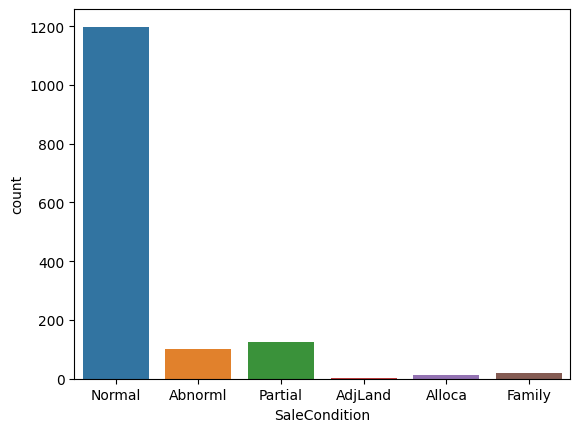

   OverallCond     Ratio
5          821  0.562329
6          252  0.172603
7          205  0.140411
8           72  0.049315
4           57  0.039041
3           25  0.017123
9           22  0.015068
2            5  0.003425
1            1  0.000685
################################


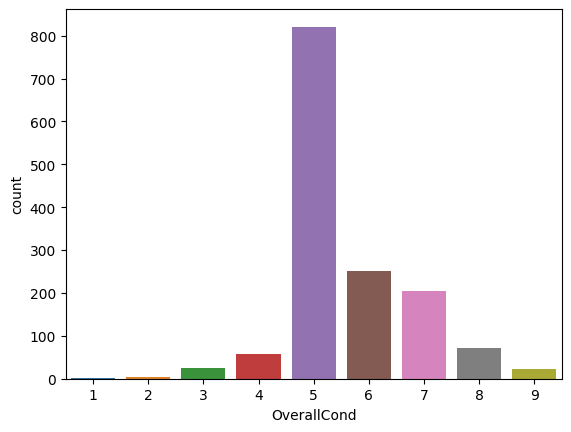

   BsmtFullBath     Ratio
0           856  0.586301
1           588  0.402740
2            15  0.010274
3             1  0.000685
################################


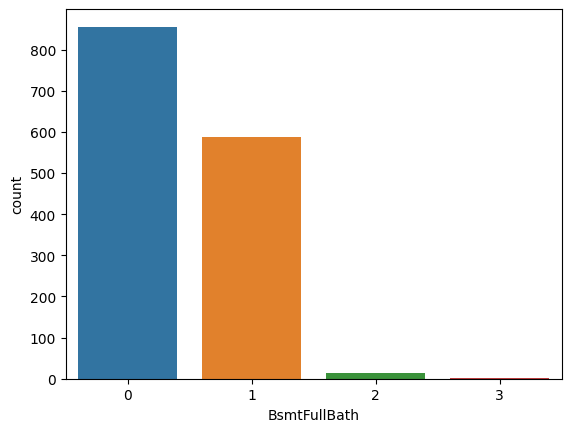

   BsmtHalfBath     Ratio
0          1378  0.943836
1            80  0.054795
2             2  0.001370
################################


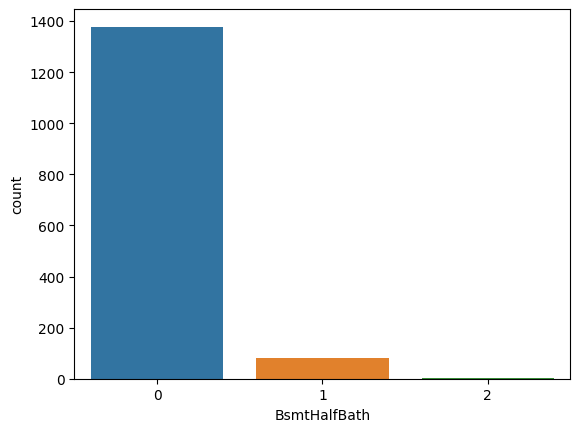

   FullBath     Ratio
2       768  0.526027
1       650  0.445205
3        33  0.022603
0         9  0.006164
################################


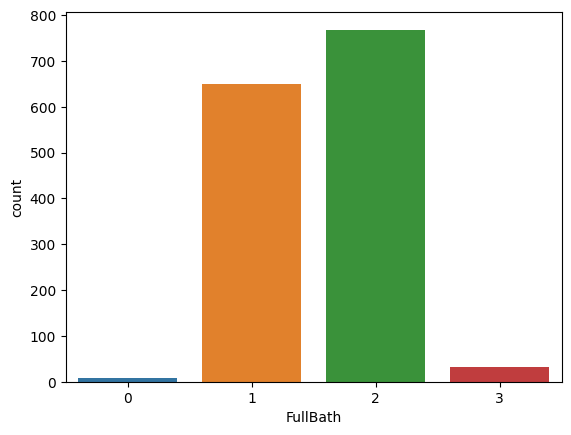

   HalfBath     Ratio
0       913  0.625342
1       535  0.366438
2        12  0.008219
################################


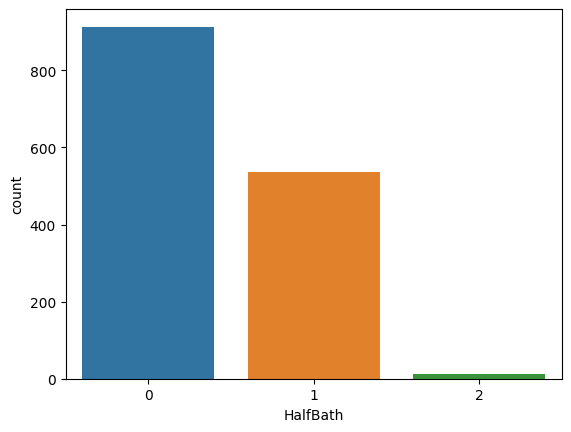

   BedroomAbvGr     Ratio
3           804  0.550685
2           358  0.245205
4           213  0.145890
1            50  0.034247
5            21  0.014384
6             7  0.004795
0             6  0.004110
8             1  0.000685
################################


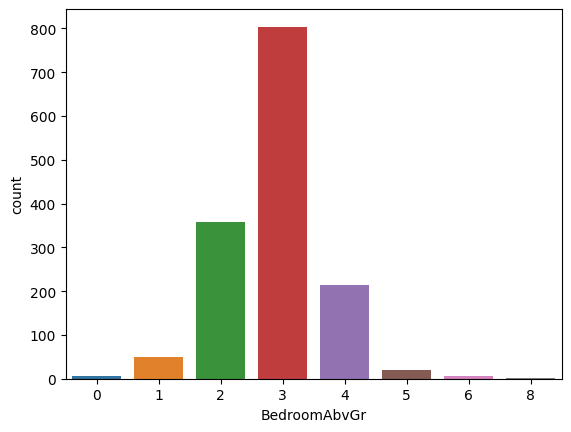

   KitchenAbvGr     Ratio
1          1392  0.953425
2            65  0.044521
3             2  0.001370
0             1  0.000685
################################


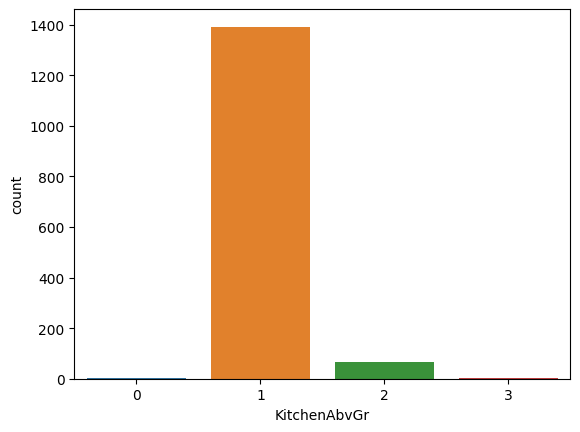

   Fireplaces     Ratio
0         690  0.472603
1         650  0.445205
2         115  0.078767
3           5  0.003425
################################


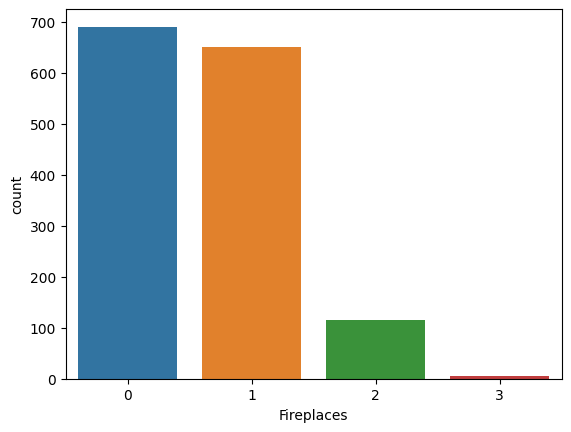

   GarageCars     Ratio
2         824  0.564384
1         369  0.252740
3         181  0.123973
0          81  0.055479
4           5  0.003425
################################


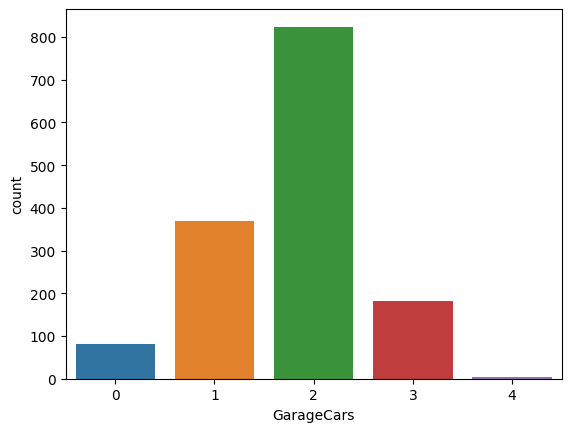

     PoolArea     Ratio
0        1453  0.995205
512         1  0.000685
648         1  0.000685
576         1  0.000685
555         1  0.000685
480         1  0.000685
519         1  0.000685
738         1  0.000685
################################


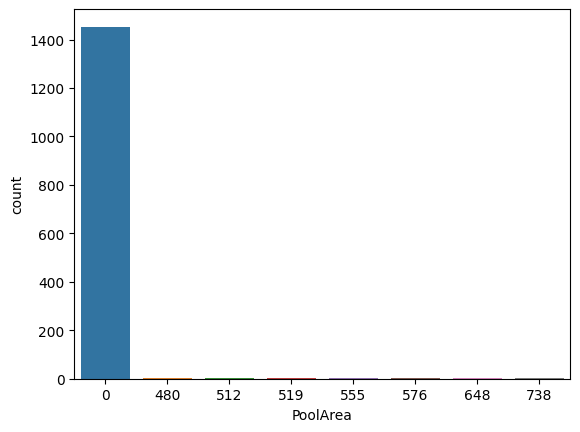

      YrSold     Ratio
2009     338  0.231507
2007     329  0.225342
2006     314  0.215068
2008     304  0.208219
2010     175  0.119863
################################


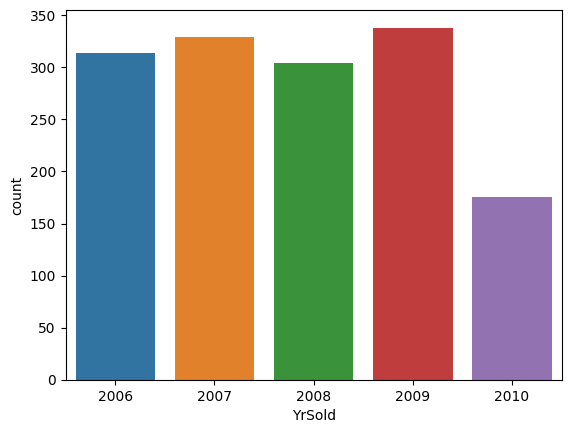

In [19]:
for col in cat_cols:
    cat_summary(df1, col, plot = True)

In [20]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()


count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
5%         73.950000
10%       146.900000
20%       292.800000
30%       438.700000
40%       584.600000
50%       730.500000
60%       876.400000
70%      1022.300000
80%      1168.200000
90%      1314.100000
95%      1387.050000
99%      1445.410000
max      1460.000000
Name: Id, dtype: float64


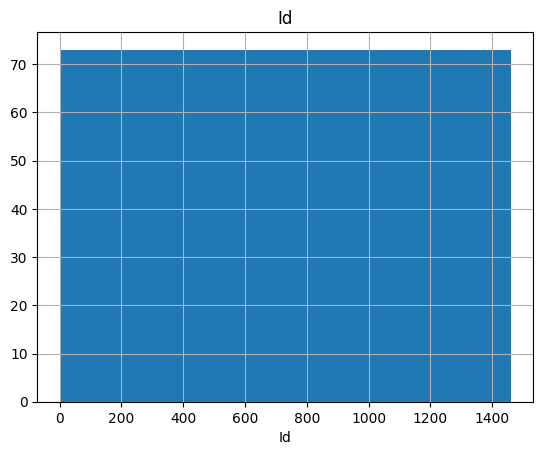

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
5%         20.000000
10%        20.000000
20%        20.000000
30%        20.000000
40%        30.000000
50%        50.000000
60%        60.000000
70%        60.000000
80%        80.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


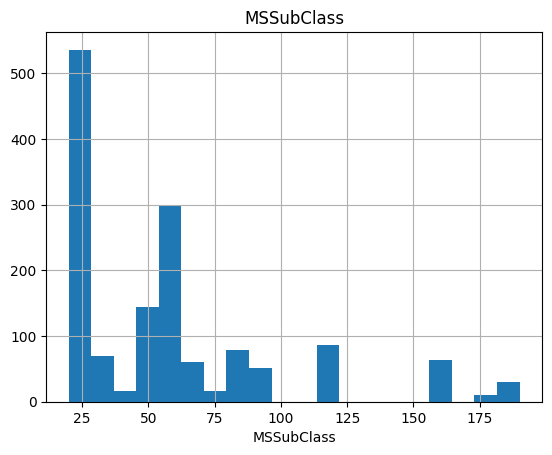

count    1201.000000
mean       69.889259
std        22.958545
min        21.000000
5%         34.000000
10%        44.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        69.000000
60%        74.000000
70%        79.000000
80%        85.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       216.500000
Name: LotFrontage, dtype: float64


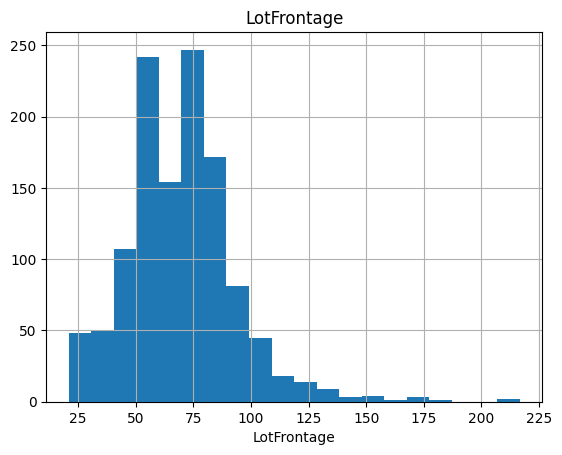

count     1460.000000
mean     10072.055394
std       5118.484147
min       1300.000000
5%        3311.700000
10%       5000.000000
20%       7078.400000
30%       8063.700000
40%       8793.400000
50%       9478.500000
60%      10198.200000
70%      11066.500000
80%      12205.800000
90%      14381.700000
95%      17401.150000
99%      37334.483250
max      38535.325000
Name: LotArea, dtype: float64


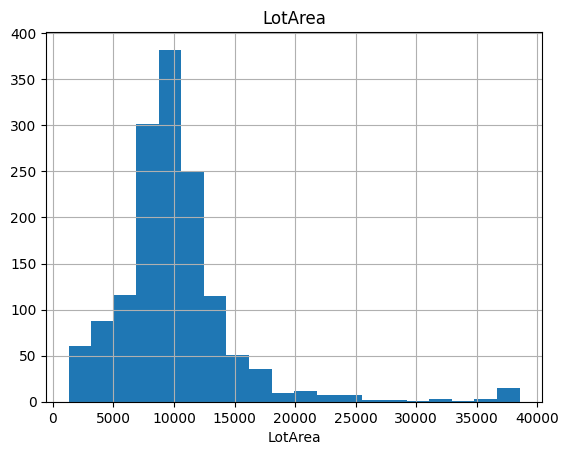

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
95%         8.000000
99%        10.000000
max        10.000000
Name: OverallQual, dtype: float64


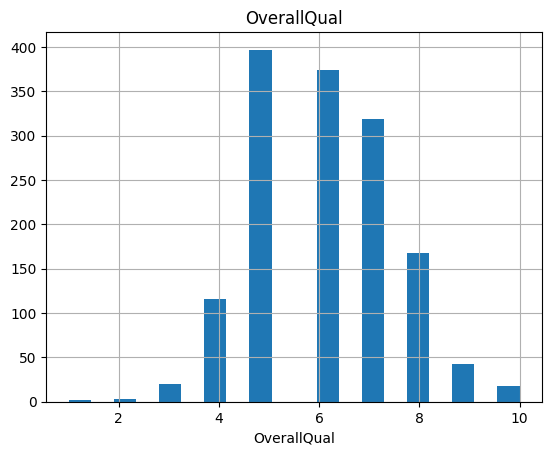

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
5%       1916.000000
10%      1924.900000
20%      1947.800000
30%      1958.000000
40%      1965.000000
50%      1973.000000
60%      1984.000000
70%      1997.300000
80%      2003.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearBuilt, dtype: float64


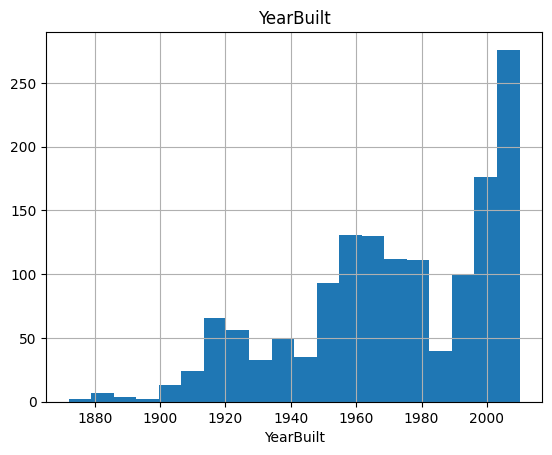

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
5%       1950.000000
10%      1950.000000
20%      1961.800000
30%      1971.000000
40%      1980.000000
50%      1994.000000
60%      1998.000000
70%      2002.000000
80%      2005.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


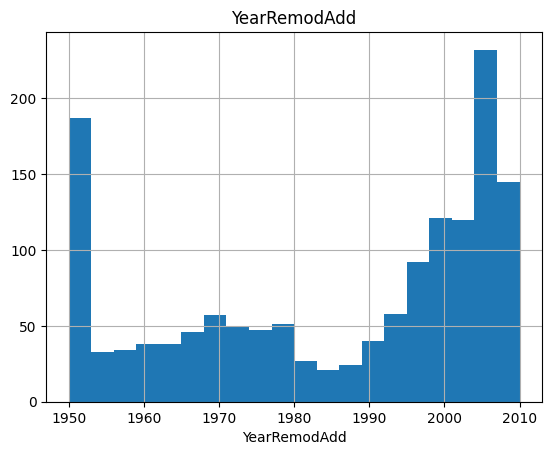

count    1452.000000
mean      103.183884
std       177.649501
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%        16.000000
70%       117.000000
80%       206.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1140.000000
Name: MasVnrArea, dtype: float64


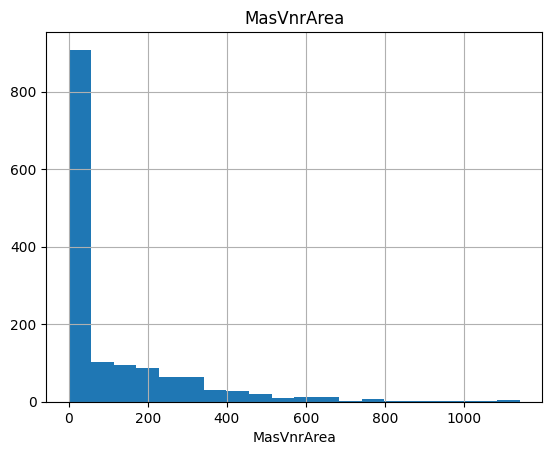

count    1460.000000
mean      441.955479
std       441.177568
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       218.600000
50%       383.500000
60%       525.600000
70%       655.000000
80%       806.400000
90%      1065.500000
95%      1274.000000
99%      1572.410000
max      3185.000000
Name: BsmtFinSF1, dtype: float64


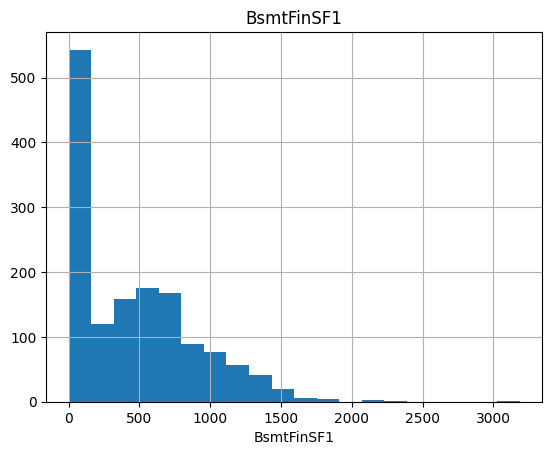

count    1460.000000
mean       45.712329
std       155.671744
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       117.200000
95%       396.200000
99%       830.380000
max       990.500000
Name: BsmtFinSF2, dtype: float64


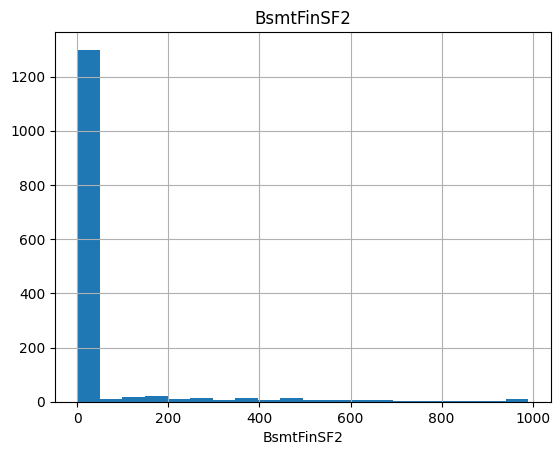

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
5%          0.000000
10%        74.900000
20%       172.000000
30%       280.000000
40%       374.600000
50%       477.500000
60%       604.400000
70%       736.000000
80%       896.000000
90%      1232.000000
95%      1468.000000
99%      1797.050000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


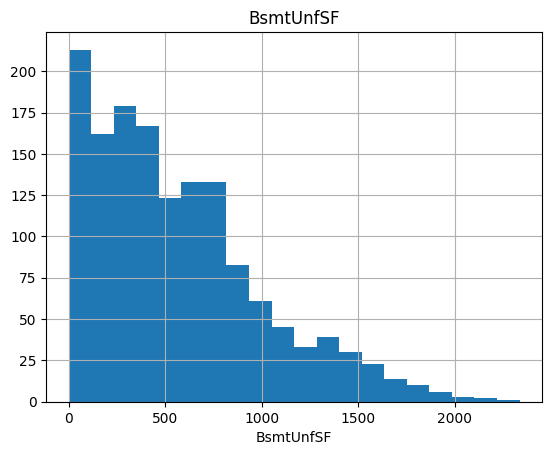

count    1460.000000
mean     1055.712705
std       423.562799
min         0.000000
5%        519.300000
10%       636.900000
20%       755.800000
30%       840.000000
40%       910.000000
50%       991.500000
60%      1088.000000
70%      1216.000000
80%      1391.200000
90%      1602.200000
95%      1753.000000
99%      2155.050000
max      3603.550000
Name: TotalBsmtSF, dtype: float64


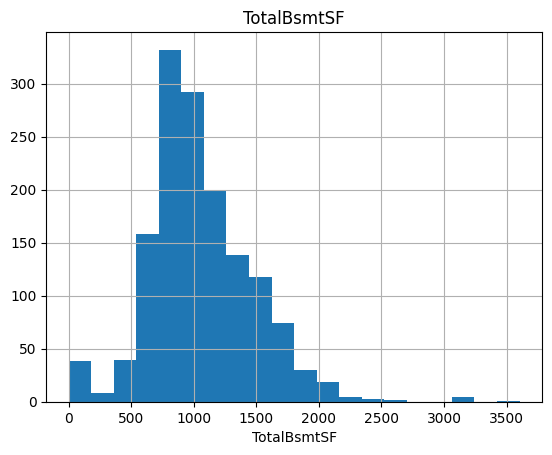

count    1460.000000
mean     1161.857329
std       380.630690
min       334.000000
5%        672.950000
10%       756.900000
20%       848.000000
30%       915.700000
40%      1000.200000
50%      1087.000000
60%      1182.000000
70%      1314.000000
80%      1482.400000
90%      1680.000000
95%      1831.250000
99%      2219.460000
max      3568.700000
Name: 1stFlrSF, dtype: float64


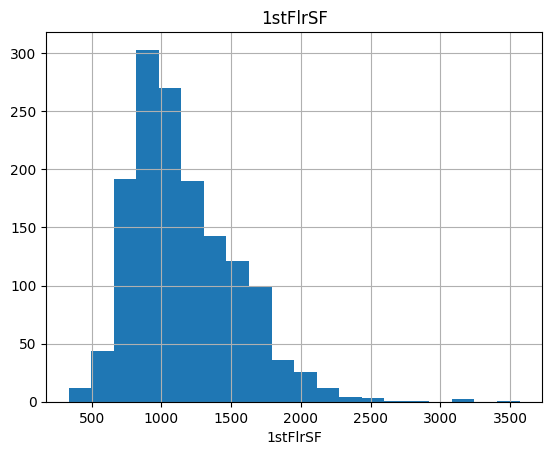

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       455.400000
70%       672.000000
80%       796.200000
90%       954.200000
95%      1141.050000
99%      1418.920000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


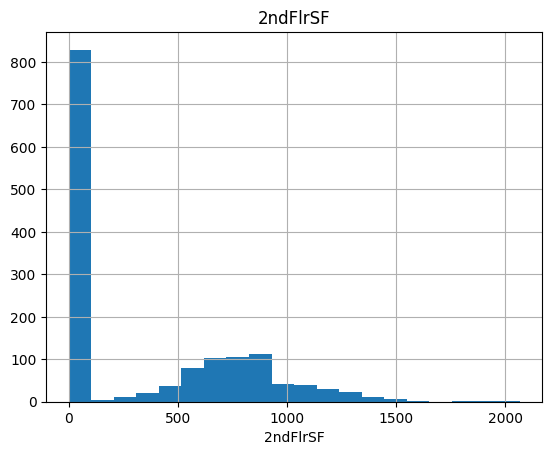

count    1460.0
mean        0.0
std         0.0
min         0.0
5%          0.0
10%         0.0
20%         0.0
30%         0.0
40%         0.0
50%         0.0
60%         0.0
70%         0.0
80%         0.0
90%         0.0
95%         0.0
99%         0.0
max         0.0
Name: LowQualFinSF, dtype: float64


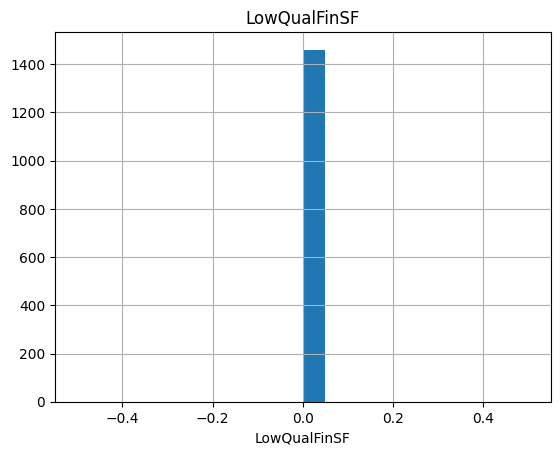

count    1460.000000
mean     1514.950856
std       521.802834
min       334.000000
5%        848.000000
10%       912.000000
20%      1066.600000
30%      1208.000000
40%      1339.000000
50%      1464.000000
60%      1578.000000
70%      1709.300000
80%      1869.000000
90%      2158.300000
95%      2466.100000
99%      3123.480000
max      4893.250000
Name: GrLivArea, dtype: float64


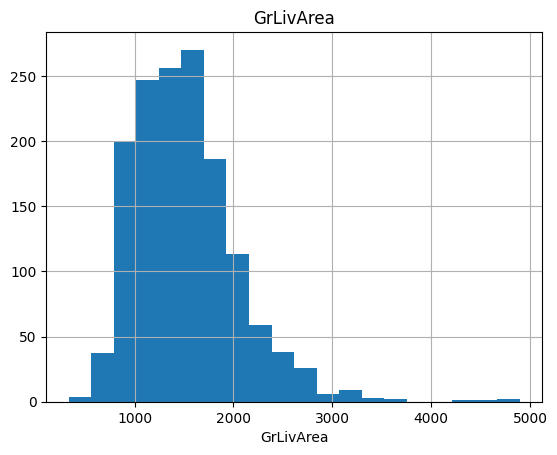

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%         9.000000
95%        10.000000
99%        11.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


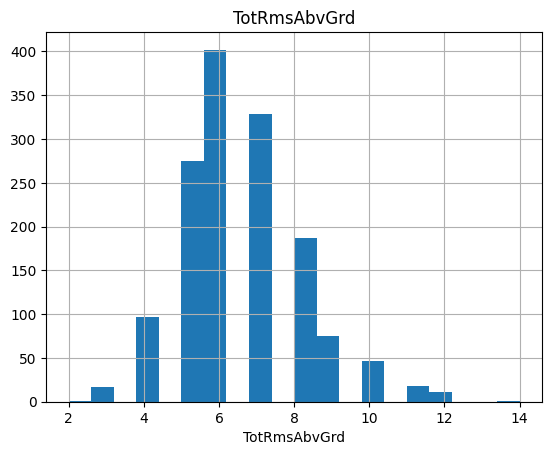

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
5%       1930.000000
10%      1945.000000
20%      1957.000000
30%      1965.000000
40%      1973.000000
50%      1980.000000
60%      1993.000000
70%      1999.000000
80%      2004.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


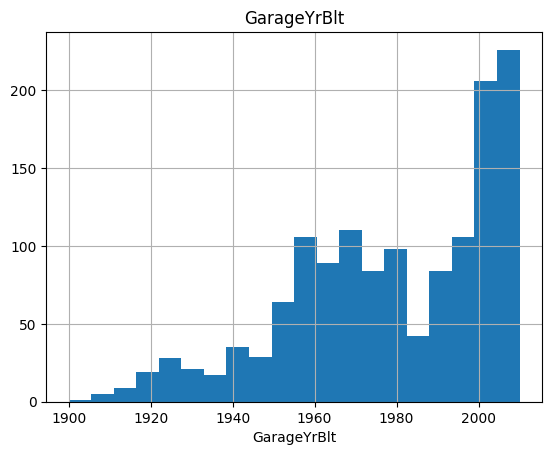

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
5%          0.000000
10%       240.000000
20%       295.600000
30%       384.000000
40%       440.000000
50%       480.000000
60%       516.000000
70%       560.000000
80%       620.200000
90%       757.100000
95%       850.100000
99%      1002.790000
max      1418.000000
Name: GarageArea, dtype: float64


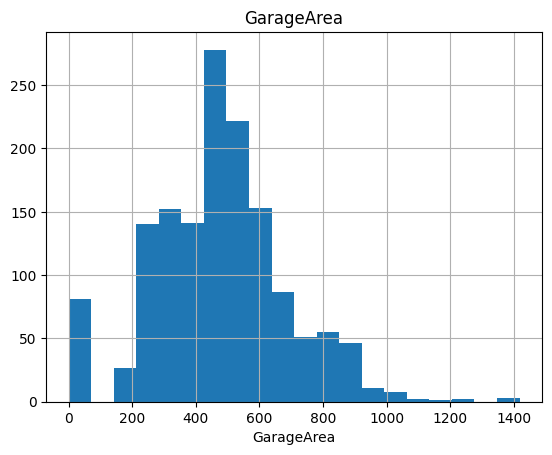

count    1460.000000
mean       94.231164
std       125.258472
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       262.000000
95%       335.000000
99%       505.460000
max       837.500000
Name: WoodDeckSF, dtype: float64


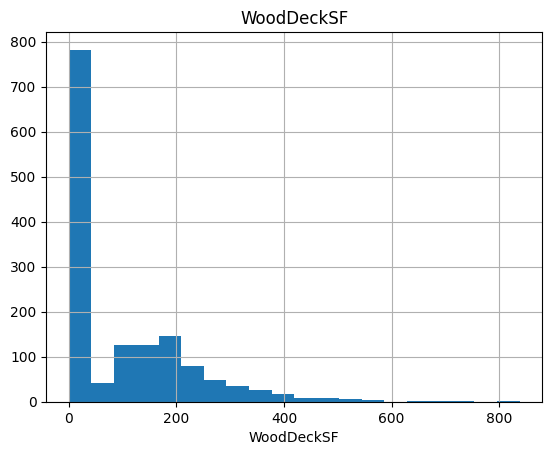

count    1460.000000
mean       46.482791
std        65.076262
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%        25.000000
60%        40.000000
70%        57.000000
80%        83.200000
90%       130.000000
95%       175.050000
99%       285.820000
max       437.625000
Name: OpenPorchSF, dtype: float64


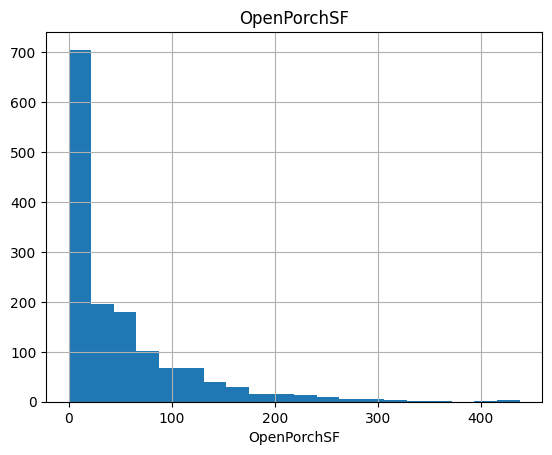

count    1460.000000
mean       21.884503
std        60.570492
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       112.000000
95%       180.150000
99%       261.050000
max       450.375000
Name: EnclosedPorch, dtype: float64


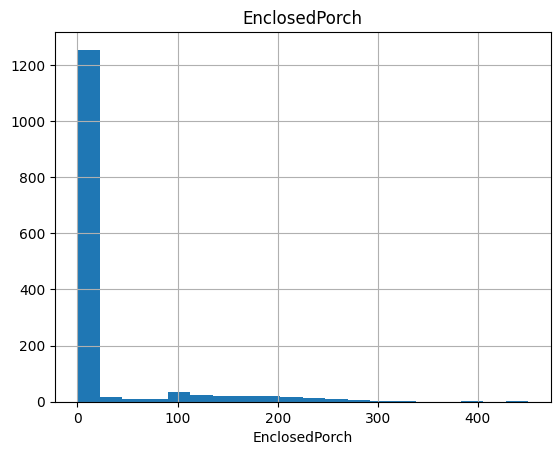

count    1460.0
mean        0.0
std         0.0
min         0.0
5%          0.0
10%         0.0
20%         0.0
30%         0.0
40%         0.0
50%         0.0
60%         0.0
70%         0.0
80%         0.0
90%         0.0
95%         0.0
99%         0.0
max         0.0
Name: 3SsnPorch, dtype: float64


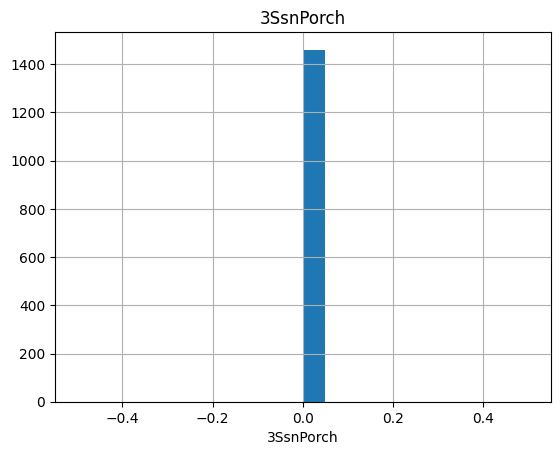

count    1460.000000
mean       14.971918
std        55.088401
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%       160.000000
99%       268.050000
max       400.000000
Name: ScreenPorch, dtype: float64


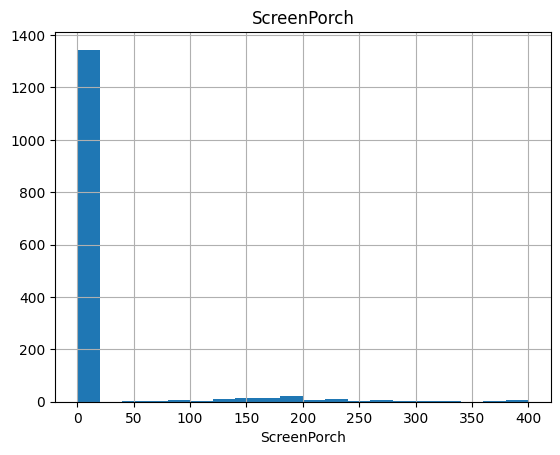

count    1460.0
mean        0.0
std         0.0
min         0.0
5%          0.0
10%         0.0
20%         0.0
30%         0.0
40%         0.0
50%         0.0
60%         0.0
70%         0.0
80%         0.0
90%         0.0
95%         0.0
99%         0.0
max         0.0
Name: MiscVal, dtype: float64


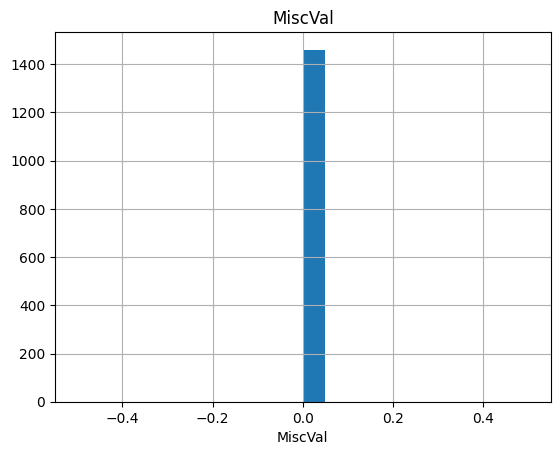

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
5%          2.000000
10%         3.000000
20%         4.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%        10.000000
95%        11.000000
99%        12.000000
max        12.000000
Name: MoSold, dtype: float64


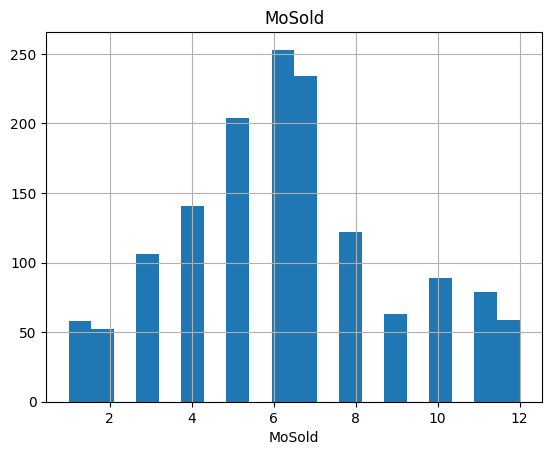

count      1460.000000
mean     180829.757534
std       78822.799556
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      683250.000000
Name: SalePrice, dtype: float64


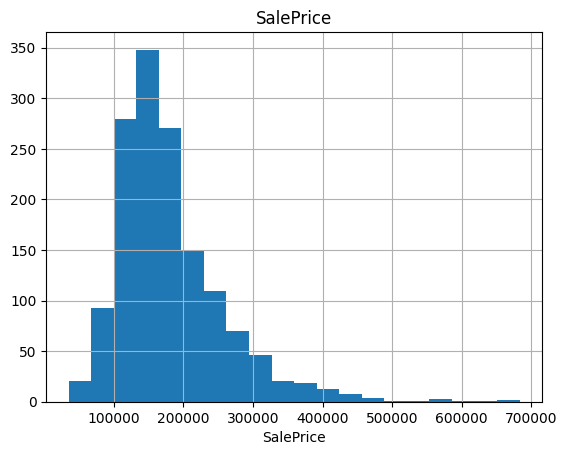

In [21]:
for col in num_cols:
    num_summary(df1, col, plot = True)

In [22]:
def target_summary_with_num(dataframe, target, num_col):
    print(dataframe.groupby(target)[num_col].agg('mean'))

In [23]:
for col in num_cols:
    target_summary_with_num(df1, 'SalePrice', col)

SalePrice
34900.0      496.0
35311.0      917.0
37900.0      969.0
39300.0      534.0
40000.0       31.0
             ...  
556581.0    1047.0
582933.0     804.0
611657.0     899.0
625000.0    1170.0
683250.0     937.5
Name: Id, Length: 662, dtype: float64
SalePrice
34900.0     30.0
35311.0     20.0
37900.0     50.0
39300.0     20.0
40000.0     70.0
            ... 
556581.0    60.0
582933.0    60.0
611657.0    20.0
625000.0    60.0
683250.0    60.0
Name: MSSubClass, Length: 662, dtype: float64
SalePrice
34900.0      60.0
35311.0      50.0
37900.0      50.0
39300.0      50.0
40000.0      50.0
            ...  
556581.0     85.0
582933.0    107.0
611657.0    100.0
625000.0    118.0
683250.0    132.0
Name: LotFrontage, Length: 662, dtype: float64
SalePrice
34900.0      7879.0
35311.0      9000.0
37900.0      5925.0
39300.0      5000.0
40000.0      8500.0
             ...   
556581.0    16056.0
582933.0    13891.0
611657.0    12919.0
625000.0    35760.0
683250.0    18579.0
Name: LotArea, 

In [24]:
df1.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [25]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isna().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum()/dataframe.shape[0])
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df1, na_name=True)

df1.isnull().sum()

              n_miss  ratio
PoolQC          1453   1.00
MiscFeature     1406   0.96
Alley           1369   0.94
Fence           1179   0.81
FireplaceQu      690   0.47
LotFrontage      259   0.18
GarageType        81   0.06
GarageYrBlt       81   0.06
GarageFinish      81   0.06
GarageQual        81   0.06
GarageCond        81   0.06
BsmtExposure      38   0.03
BsmtFinType2      38   0.03
BsmtFinType1      37   0.03
BsmtCond          37   0.03
BsmtQual          37   0.03
MasVnrArea         8   0.01
MasVnrType         8   0.01
Electrical         1   0.00


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [26]:
df1 = df1.drop(columns=['PoolQC','MiscFeature','Alley','Fence'], axis=1)

In [27]:
df1 = df1.drop(columns='Id',axis=1)

In [28]:
def fill_na(dataframe, col_name):
    if dataframe[col_name].dtypes != 'O' and dataframe[col_name].isna().sum() > 0 :
        dataframe[col_name] = dataframe[col_name].fillna(dataframe[col_name].mean())
    elif dataframe[col_name].dtypes == 'O' and dataframe[col_name].isna().sum() > 0:
        dataframe[col_name] = dataframe[col_name].fillna(dataframe[col_name].mode()[0]) 
           

In [29]:
for col in df1.columns:
    fill_na(df1, col)

In [30]:
df1.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
cat_cols, num_cols, cat_but_car = grab_col_names(df1)


Observations: 1460
Variables: 76
cat_cols: 52
num_cols: 23
cat_but_car: 1
num_but_cat: 14


In [33]:
important_num_cols = list(df1.corr()["SalePrice"][(df1.corr()["SalePrice"]>0.50) | (df1.corr()["SalePrice"]<-0.50)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df1 = df1[important_cols]

In [34]:
cat_cols, num_cols, cat_but_car = grab_col_names(df1)

# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df1.columns if df1[col].dtypes == "O" and df1[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df1 = label_encoder(df1, col)

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df1 = one_hot_encoder(df1, cat_cols, drop_first=True)

df1.head()

Observations: 1460
Variables: 76
cat_cols: 52
num_cols: 23
cat_but_car: 1
num_but_cat: 14


,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_576,PoolArea_648,PoolArea_738,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,60,65.0,8450.0,CollgCr,7,2003,2003,196.0,706,0.0,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600.0,Veenker,6,1976,1976,0.0,978,0.0,...,0,0,0,0,0,0,1,0,0,0
2,60,68.0,11250.0,CollgCr,7,2001,2002,162.0,486,0.0,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550.0,Crawfor,7,1915,1970,0.0,216,0.0,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260.0,NoRidge,8,2000,2000,350.0,655,0.0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
df1

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_576,PoolArea_648,PoolArea_738,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,60,65.0,8450.0,CollgCr,7,2003,2003,196.0,706,0.0,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600.0,Veenker,6,1976,1976,0.0,978,0.0,...,0,0,0,0,0,0,1,0,0,0
2,60,68.0,11250.0,CollgCr,7,2001,2002,162.0,486,0.0,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550.0,Crawfor,7,1915,1970,0.0,216,0.0,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260.0,NoRidge,8,2000,2000,350.0,655,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,Gilbert,6,1999,2000,0.0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
1456,20,85.0,13175.0,NWAmes,6,1978,1988,119.0,790,163.0,...,0,0,0,0,0,0,0,0,0,1
1457,70,66.0,9042.0,Crawfor,7,1941,2006,0.0,275,0.0,...,0,0,0,0,0,0,0,0,0,1
1458,20,68.0,9717.0,NAmes,5,1950,1996,0.0,49,990.5,...,0,0,0,0,0,0,0,0,0,1


In [36]:
y = df1['SalePrice']
X = df1.drop(['SalePrice'], axis=1)
X = X.drop(columns = cat_but_car, axis = 1)

In [37]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,PoolArea_512,PoolArea_519,PoolArea_555,PoolArea_576,PoolArea_648,PoolArea_738,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,60,65.0,8450.0,7,2003,2003,196.0,706,0.0,150,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600.0,6,1976,1976,0.0,978,0.0,284,...,0,0,0,0,0,0,1,0,0,0
2,60,68.0,11250.0,7,2001,2002,162.0,486,0.0,434,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550.0,7,1915,1970,0.0,216,0.0,540,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260.0,8,2000,2000,350.0,655,0.0,490,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917.0,6,1999,2000,0.0,0,0.0,953,...,0,0,0,0,0,0,1,0,0,0
1456,20,85.0,13175.0,6,1978,1988,119.0,790,163.0,589,...,0,0,0,0,0,0,0,0,0,1
1457,70,66.0,9042.0,7,1941,2006,0.0,275,0.0,877,...,0,0,0,0,0,0,0,0,0,1
1458,20,68.0,9717.0,5,1950,1996,0.0,49,990.5,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [41]:
import lightgbm as lgb
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2968
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 144
[LightGBM] [Info] Start training from score 180064.245597


LGBMRegressor()

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred)}')

Mean Squared Error : 768648195.6946384


In [45]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}